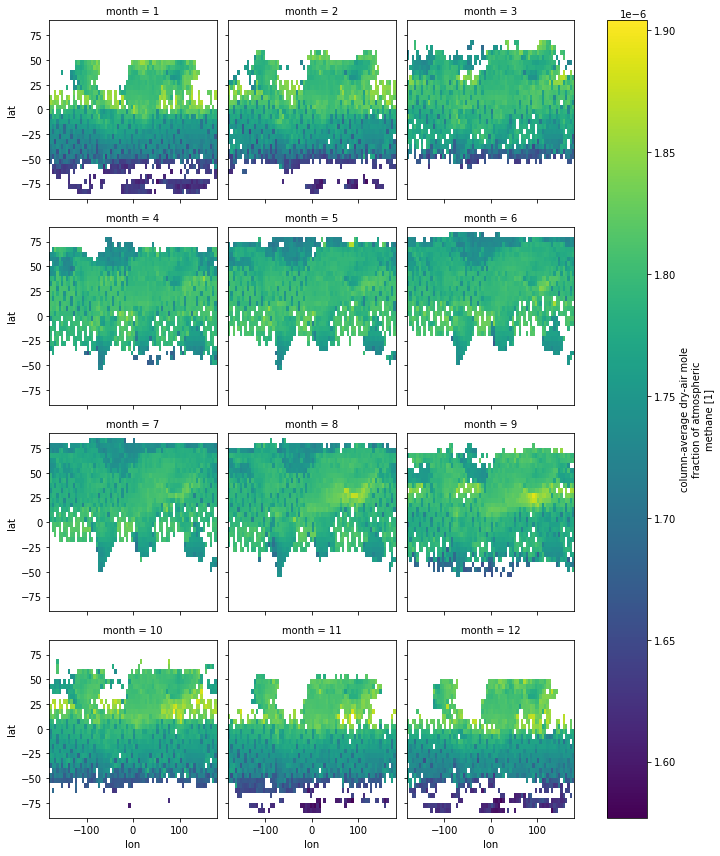

In [1]:
import xarray as xr
import netCDF4
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
%matplotlib inline

ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ds1 = ds.xch4.groupby("time.month").mean() # get mean value of month data
ds1.plot(x = "lon", y = "lat", col = "month", col_wrap=3) # plot 12 panels

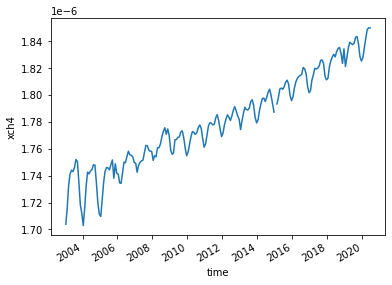

In [2]:
ds.xch4.mean(("lon", "lat")).plot() #Because the date only has date on 2003-01 to 2020-06

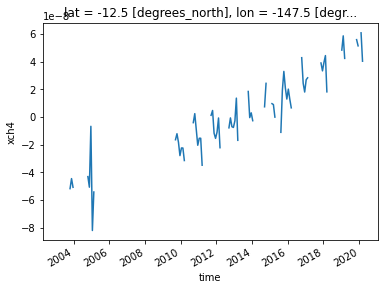

In [3]:
group_data = ds.xch4.groupby("time.month")

xch4_anom = group_data - group_data.mean(dim = 'time')
xch4_anom.sel(lon = -150,lat = -15, method = "nearest").plot()

In [4]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

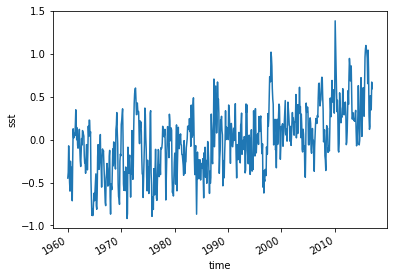

In [5]:
nino = ds.sst.sel(lon = slice(10, 60), lat = slice(-5, 5))
nino_month = nino.groupby("time.month")
nino_2 = nino_month-nino_month.mean(dim = "time")
nino_2.mean(dim=["lat", "lon"]).plot()

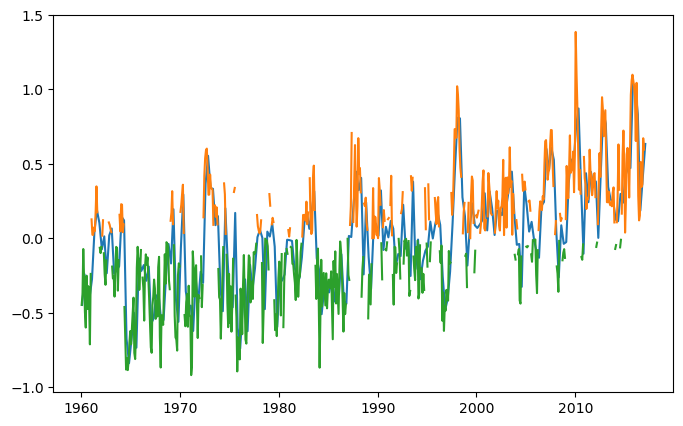

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(8,5), dpi=100)
nino3 = nino_2.mean(dim=["lat", "lon"]).resample(time = "3M")
index = nino3.mean(dim = "time")
nino4 = nino_2.mean(dim=["lat", "lon"])
el_nino = nino4.where(nino4 > 0)
la_nino = nino4.where(nino4 < 0)
ax1.plot(index.time,index)

ax1.plot(el_nino.time,el_nino)

ax1.plot(la_nino.time,la_nino)

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 181, time: 252)
Coordinates:
  * longitude  (longitude) float32 65.0 65.1 65.2 65.3 ... 104.8 104.9 105.0
  * latitude   (latitude) float32 42.0 41.9 41.8 41.7 ... 24.3 24.2 24.1 24.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 0.0005054 ... 0.0009076
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-31 02:29:44 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

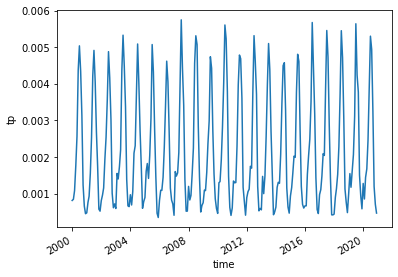

In [7]:
ds = xr.open_dataset("precipitation00-21.nc", engine="netcdf4")
ds.tp.mean(dim=["longitude", "latitude"]).plot()
ds

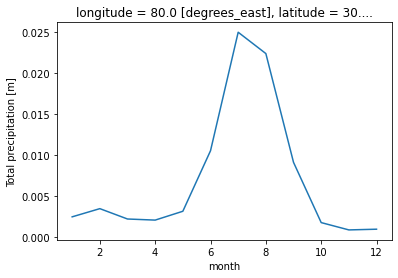

In [8]:
group_data = ds.tp.groupby("time.month").mean()
group_data.sel(latitude = 30, longitude = 80, method = "nearest").plot()

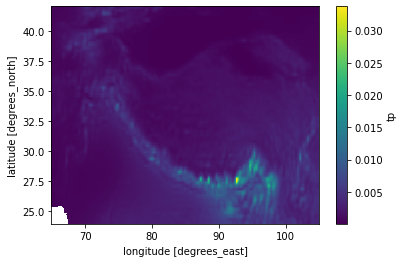

In [9]:
ds.tp.mean(dim = "time").plot()

D:\Anaconda3\envs\aaaa\lib\site-packages\xarray\plot\plot.py:1485: UserWarning: The following kwargs were not used by contour: 'level'
  primitive = ax.contourf(x, y, z, **kwargs)


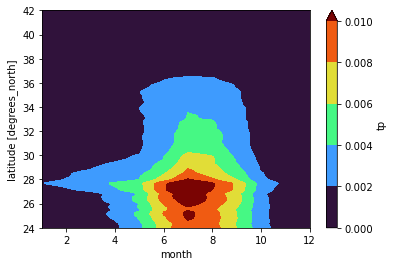

In [10]:
ds.tp.groupby("time.month").mean().mean(dim = "longitude").transpose().plot.contourf(level = 12, robust=True, cmap="turbo")

D:\Anaconda3\envs\aaaa\lib\site-packages\xarray\plot\plot.py:1485: UserWarning: The following kwargs were not used by contour: 'level'
  primitive = ax.contourf(x, y, z, **kwargs)


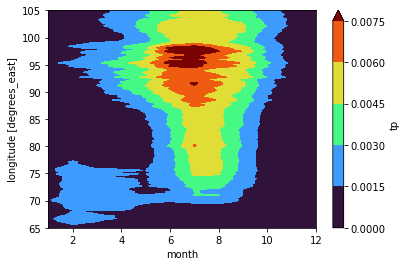

In [11]:
ds.tp.groupby("time.month").mean().mean(dim = "latitude").transpose().plot.contourf(level = 12, robust=True, cmap="turbo")

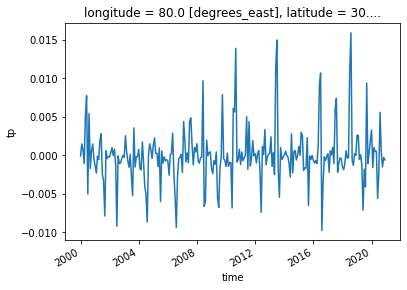

In [12]:
group_data = ds.tp.groupby("time.month")
anom = group_data-group_data.mean(dim = "time")
anom.sel(latitude = 30, longitude = 80, method = "nearest").plot()